In [ ]:
#Step 1. 구글 코랩에 한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 이제 구글 코랩의 상위메뉴에서 런타임 -> 런타임 다시 시작 수행하세요

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
test_dataset = pd.read_csv(io.BytesIO(myfile['result_10n_tags.csv']) )
test_dataset

Saving result_10n_tags.csv to result_10n_tags (1).csv


,index,FileName,Genres,chroma_stft,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10
0,0,Barb Wire (trailer).wav,Action,0.620046,0.099846,2817.143513,2698.053734,5592.271604,0.079533,-2.441482,7,0,47,5,8,23,3,6,2,10
1,1,Batman Forever - Trailer (deutsch).wav,Action,0.390794,0.076080,2210.679414,1746.864187,3890.178273,0.087169,-5.245961,6,3,14,12,4,45,15,7,1,8
2,2,Beneath the Planet of the Apes (1970 Trailer).wav,Action,0.387193,0.015711,1437.005064,1684.315912,2413.000472,0.041028,-18.479073,24,2,1,10,4,30,17,12,25,9
3,3,Bloodsport 2 The Next Kumite Trailer 1996.wav,Action,0.516038,0.059182,1761.479524,1764.853955,3640.331383,0.055211,-3.334945,3,6,5,45,14,10,8,11,2,7
4,4,Braddock Missing in Action 3 - Theatrical Trai...,Action,0.375998,0.016033,1772.127941,1920.352146,3434.880164,0.047895,-18.045546,1,17,4,24,2,35,10,12,49,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Ju Dou Trailer.wav,Romance,0.318505,0.025413,1331.267695,1727.841360,2389.352311,0.032113,-15.525991,25,2,24,10,1,5,30,17,6,15
96,96,JUNGLE FEVER - Trailer - HQ.wav,Romance,0.542443,0.065472,1819.145863,2290.613171,3931.652516,0.035905,-5.164002,3,5,6,11,0,2,14,18,1,27
97,97,LEAVING LAS VEGAS - Trailer ( 1995 ).wav,Romance,0.523195,0.059891,1818.222149,2351.893084,3973.614068,0.038820,-2.293998,5,2,0,6,3,11,1,20,16,9
98,98,Native Son (1986) Trailer.wav,Romance,0.340106,0.022955,1687.080465,1795.069854,3013.505495,0.053558,-12.442860,1,12,4,17,2,15,24,20,5,25


In [ ]:
#Step 2. 훈련용데이터셋과 테스트용 데이터셋으로 분리
from sklearn.model_selection import train_test_split

data = test_dataset[['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate', 'mfcc',
                     'tag1', 'tag2', 'tag3', 'tag4','tag5',
                     'tag6', 'tag7', 'tag8', 'tag9', 'tag10']]
target= test_dataset['Genres']

train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size = 0.3, random_state=40
)


In [ ]:
#Step 3.랜덤 포레스트로 모델 생성 및 평가
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1 , random_state=40)
# 이 곳에 랜덤 포레스트로 학습시키는 코드를 완성하세요.
rf.fit(train_data, train_target)
rf.score(test_data , test_target)

0.43333333333333335

In [ ]:
print( rf.predict(test_data[:5]) )
#print( rf.predict(test_data[:]) )

['Horror' 'Comedy' 'Comedy' 'Horror' 'Horror']


In [ ]:
# Step 4.테스트 데이터의 예측 결과 보기
real_result=pd.DataFrame()
predict_result = pd.DataFrame(rf.predict(test_data),columns=['predict_result'])
result = pd.concat([test_data.reset_index(drop=True), predict_result],axis=1)
result[:]

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,predict_result
0,0.449251,0.029936,1680.929831,1900.499805,3458.484347,0.037650,-7.470347,2,10,4,5,24,1,12,6,16,30,Horror
1,0.491181,0.039746,2209.434901,2597.486406,4881.266559,0.046570,-6.735287,2,24,5,10,30,0,6,20,1,17,Comedy
2,0.415271,0.060642,2778.267606,2360.422282,4855.991230,0.085742,-12.797683,2,24,17,10,6,3,1,18,20,45,Comedy
3,0.482510,0.056461,1540.026038,1681.987113,2918.817219,0.041803,-7.821810,1,4,12,10,6,2,3,45,17,5,Horror
4,0.414634,0.012841,1914.789070,2072.266622,3892.324966,0.051328,-14.134914,1,4,17,12,24,2,30,34,20,18,Horror
5,0.566877,0.027714,1309.719936,1830.868601,2894.659338,0.027340,-6.122045,24,5,2,10,6,3,1,11,14,4,Action
6,0.556489,0.017419,4445.560403,3109.257756,7784.053485,0.143024,-11.904154,6,3,2,24,11,14,5,0,10,30,Comedy
7,0.500629,0.017216,2811.503502,2680.732150,5719.950486,0.077507,-11.342509,1,2,24,17,4,6,12,0,3,20,Comedy
8,0.531816,0.024858,1991.646155,2255.524128,4177.312421,0.046674,-7.803428,2,24,6,5,3,10,1,4,11,14,Action
9,0.396215,0.057707,1407.872675,1954.803403,2719.683238,0.031112,-9.814537,2,1,6,10,17,3,18,35,24,14,Horror


In [ ]:
result.to_csv('predict_result.csv', index=True, sep=",", encoding="utf-8-sig")

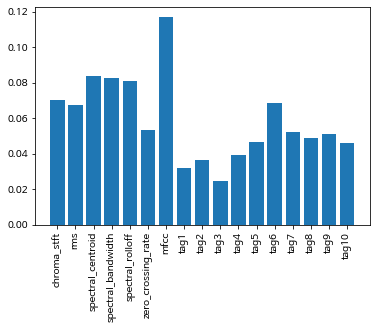

In [ ]:
#Step 5. 어떤 특성을 중요하게 사용했는지 확인하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

imp = rf.feature_importances_
plt.figure()
plt.bar(range(len(imp)),imp)
plt.xticks(range(len(imp)),data.columns, rotation=90)
plt.show()

In [ ]:
# Step 6.학습된 모델 저장하기
import joblib
from google.colab import files

# 모델을 훈련합니다.
model = rf.fit(train_data , train_target)

# 모델을 피클 파일로 저장합니다.
joblib.dump(model, "result_10n_tags.pkl")
files.download('result_10n_tags.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>